In [1]:
#Importing all required files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
!pip install statsmodels --user

In [2]:
#Getting the file and removing all invalid values
df = pd.read_csv('cardio_train.csv', sep=';')
df=df[(df['ap_hi']<200) & (df['ap_lo']<200) & (df['ap_lo']>0) & (df['ap_hi']>0)]

In [3]:
#Finding correlation between Systolic and Diabolic

corr = stats.pearsonr(df['ap_hi'], df['ap_lo'])
print('Correlation coefficient:', corr[0])

Correlation coefficient: 0.6415958517723281


In [4]:
#Creating the linear regression model for systolic and diabolic

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = df['ap_hi']
y_vals = df['ap_lo']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ap_lo   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                 4.816e+04
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        04:19:15   Log-Likelihood:            -2.3563e+05
No. Observations:               68836   AIC:                         4.713e+05
Df Residuals:                   68834   BIC:                         4.713e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0608      0.208    173.375      0.000      35.653      36.468
ap_hi          0.3585      0.002    219.454      0.000       0.355       0.362
==============================================================================
Omnibus:                    27736.376   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1446856.296
Skew:                           1.172   Prob(JB):                         0.00
Kurtosis:                      25.337   Cond. No.                         937.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

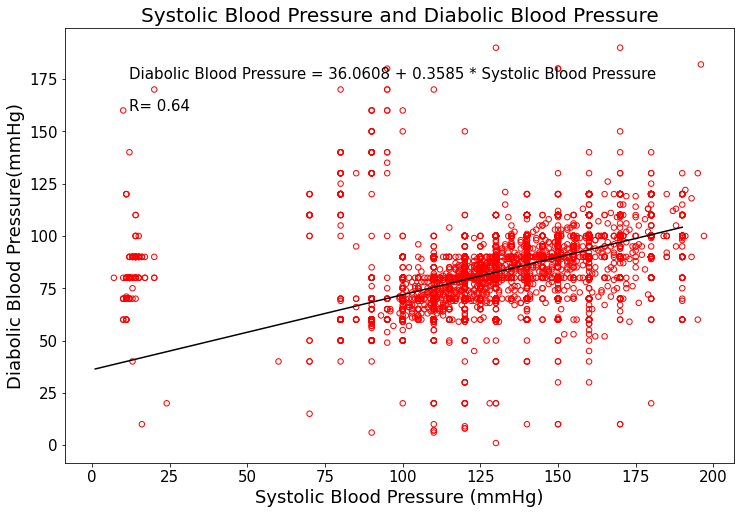

In [5]:
#Creating the scatterplot for systolic and diabolic

import matplotlib.pyplot as plt
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(df['ap_lo']),
                     np.max(df['ap_lo']), 100)
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df['ap_hi'], df['ap_lo'], c='none',
            edgecolors='red', s=30)
axs.plot(x_plot, x_plot*b1 + b0, color='black')
plt.title("Male height vs weight", fontsize=20)
plt.title("Systolic Blood Pressure and Diabolic Blood Pressure", fontsize=20)
axs.set_xlabel("Systolic Blood Pressure (mmHg)", fontsize=18)
axs.set_ylabel("Diabolic Blood Pressure(mmHg)", fontsize=18)
axs.tick_params(labelsize=15)
plt.text(12,175, "Diabolic Blood Pressure = 36.0608 + 0.3585 * Systolic Blood Pressure", size=15)
plt.text(12,160, "R= 0.64",size=15)
plt.show()

In [6]:
#getting two datasets with and without cardiovascular disease

dfcd=df[df['cardio']==1]
dfnocd=df[df['cardio']==0]

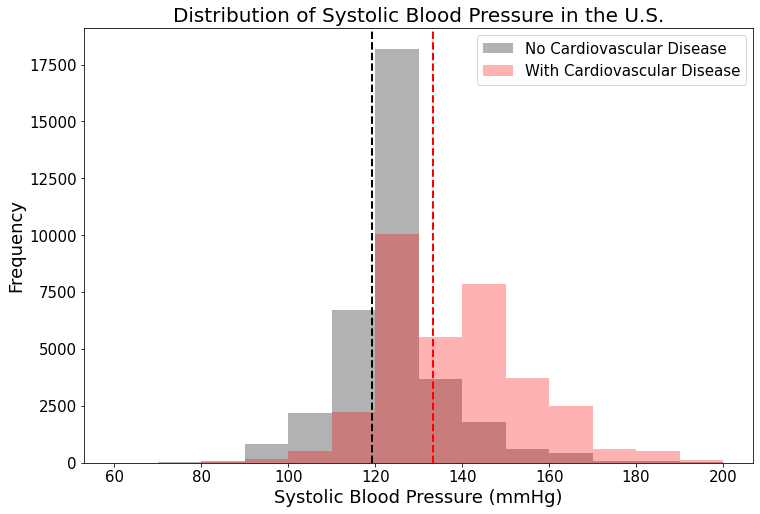

In [7]:
#making a grouped histogram for systolic blood pressure

fig, axs = plt.subplots(figsize=(12,8))
axs.hist(dfnocd['ap_hi'], color="Black", alpha=0.3,
         bins=np.linspace(60,200,15), label='No Cardiovascular Disease')
axs.hist(dfcd['ap_hi'], color="r", alpha=0.3 ,
         bins=np.linspace(60,200,15), label='With Cardiovascular Disease')

plt.title("Distribution of Systolic Blood Pressure in the U.S.", fontsize=20)
axs.set_xlabel("Systolic Blood Pressure (mmHg)", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})

axs.axvline(np.mean(dfcd['ap_hi']), color='r', ls='dashed', lw=2)
axs.axvline(np.mean(dfnocd['ap_hi']), color='Black', ls='dashed', lw=2)

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


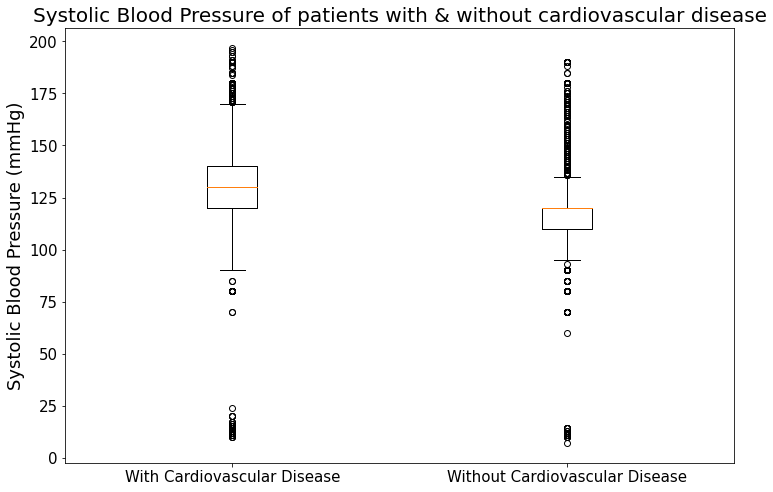

In [8]:
#making a grouped boxplot for systolic blood pressure

fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([dfcd['ap_hi'], dfnocd['ap_hi']])
plt.title('Systolic Blood Pressure of patients with & without cardiovascular disease', fontsize=20)
axs.set_xticklabels(['With Cardiovascular Disease','Without Cardiovascular Disease'])
axs.set_ylabel('Systolic Blood Pressure (mmHg)', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

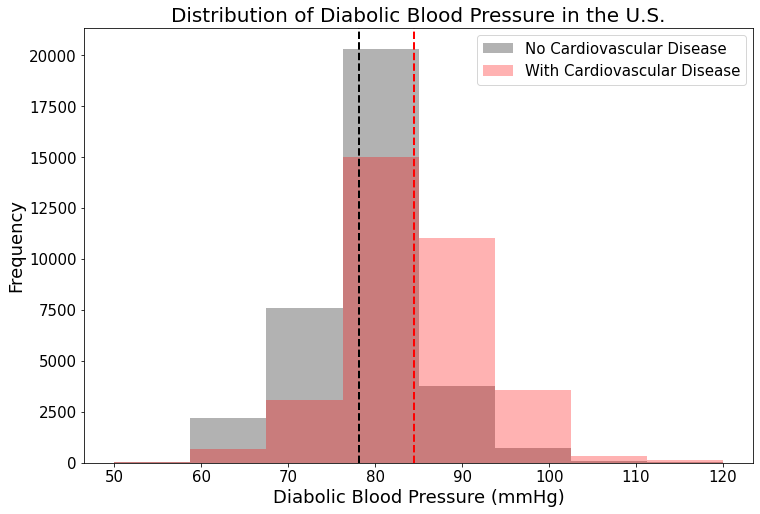

In [9]:
#making a grouped histogram for diabolic blood pressure

fig, axs = plt.subplots(figsize=(12,8))
axs.hist(dfnocd['ap_lo'], color="Black", alpha=0.3,
         bins=np.linspace(50,120,9), label='No Cardiovascular Disease')
axs.hist(dfcd['ap_lo'], color="r", alpha=0.3 ,
         bins=np.linspace(50,120,9), label='With Cardiovascular Disease')

plt.title("Distribution of Diabolic Blood Pressure in the U.S.", fontsize=20)
axs.set_xlabel("Diabolic Blood Pressure (mmHg)", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})

axs.axvline(np.mean(dfcd['ap_lo']), color='r', ls='dashed', lw=2)
axs.axvline(np.mean(dfnocd['ap_lo']), color='Black', ls='dashed', lw=2)

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


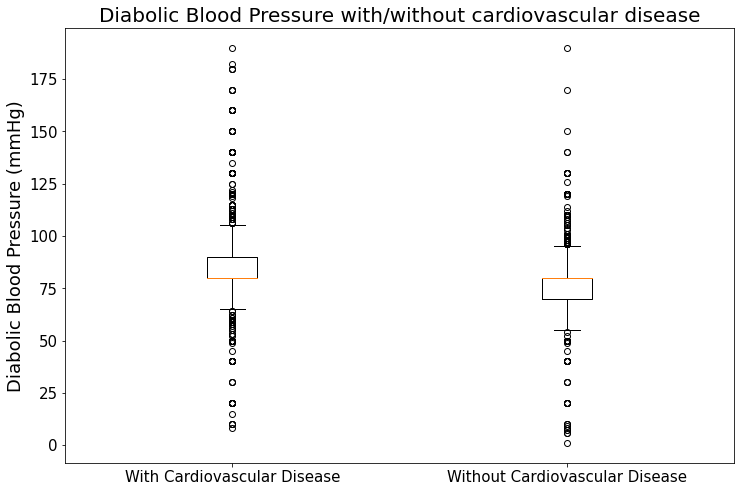

In [10]:
#making a grouped boxplot for Diabolic blood pressure

fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([dfcd['ap_lo'], dfnocd['ap_lo']])
plt.title('Diabolic Blood Pressure with/without cardiovascular disease', fontsize=20)
axs.set_xticklabels(['With Cardiovascular Disease','Without Cardiovascular Disease'])
axs.set_ylabel('Diabolic Blood Pressure (mmHg)', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()